In [1]:
# This neural network, made by Keras module. It's going to be trained to recognize 
# hand-written numbers from mnist dataset

import numpy as np


# we are going to use matplotlib to output results 
import matplotlib.pyplot as plt
# loading mnist dataset 


#  IMPORTANT - this string could be highlighted as an error, but in some cases
# it happens because of tensorflow version, so just try to run code 
from tensorflow.keras.datasets import mnist 

# loading keras module from tensorflow
from tensorflow import keras
# to make layers automatically, without hand-writing let's use layers from keras and import Dense and Flatten from it


#  IMPORTANT - this string could be highlighted as an error, but in some cases
# it happens because of tensorflow version, so just try to run code 
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline


import ssl

# comment this string if you havent any problems with SSL documentation
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# loading data from mnist into 4 variables
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# where x_train, y_train - training data and x_test, y_test - data for testing 
# how good NN works.

In [3]:
x_train = x_train / 255
x_test = x_test / 255
# every image in mnist dataset has 255 pixels, so lets normalize data to [0, 1] range

In [4]:
y_train_bv = keras.utils.to_categorical(y_train, 10)
y_test_bv = keras.utils.to_categorical(y_test, 10)

# using keras.utils.to_categorical we make binary vecrots (with 10 elements in each)
#   from y_train and y_test

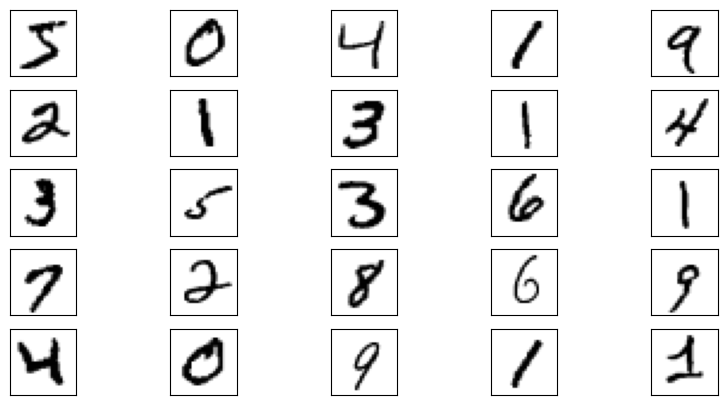

In [5]:
# Not so important code part - use it if you want to output first 25 (or more) images 
# from x_train using matplotlib

plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [6]:
# neural network model creating

# previously we created such models by oursefl
# but using keras.Sequential it could be much easier 

model = keras.Sequential([


    # creating first layer with Flatten, which ussualy using in recognition tasks
    # 28 and 28 - size of image, so we are going to have 28*28 (784) neuros on the first layer 
    # number "1" in the input_shape parameter indicates the number of image channels.

    Flatten(input_shape=(28, 28, 1)), 

    # second (hidden layer) made by Dense as usual layer, where 128 is ammount of neuros
    # and relu is activation function
    Dense(128, activation='relu'),


    # actually you may add as many layers as you want, but this may affect the quality of learning and functioning
    # Dense(64, activation='relu'),


    # last output layer with 10 neuros and softmax as an activation function
    Dense(10, activation = 'softmax') 
])



In [7]:
# we may output the structure of NN by this string
print(model.summary())
# colums "param" is going to show how many weights are going TO each layer 
# "shape" is going to show how many neuros on each layer are

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [8]:
# here we compile our NN model using adam optimizer to assign weights by the most effective way
# loss function os 'loss' is a way to weights assigning (in previouse codes it was done autmatically as back propagation method)
# 'metrics' hepls to understand how effectibe model is
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


# if adam optimizer doesnt work because of some reason or works badly,
#  you may create your own optimizer, which is based, 
# for example on SGD optimization method by such way:


# myOpt = keras.optimizers.legacy.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)

# model.compile(optimizer=myOpt, 
#               loss='categorical_crossentropy',
#               metrics=['accuracy']
#               )

In [9]:
model.fit(x_train, y_train_bv, batch_size=32, epochs=5, validation_split=0.2)
# here we fitting data to NN and asinging ammount of epochs and validation_split, which is analog of learning rate 
# we also can see how effective NN was trained during each epoch
# as it accuracy closer to 1 as more effective training was

Epoch 1/5
1500/1500 [==============================] - 2s 929us/step - loss: 0.2886 - accuracy: 0.9174 - val_loss: 0.1596 - val_accuracy: 0.9546
Epoch 2/5
1500/1500 [==============================] - 1s 890us/step - loss: 0.1326 - accuracy: 0.9604 - val_loss: 0.1253 - val_accuracy: 0.9621
Epoch 3/5
1500/1500 [==============================] - 1s 859us/step - loss: 0.0920 - accuracy: 0.9722 - val_loss: 0.1053 - val_accuracy: 0.9682
Epoch 4/5
1500/1500 [==============================] - 1s 847us/step - loss: 0.0696 - accuracy: 0.9787 - val_loss: 0.1001 - val_accuracy: 0.9693
Epoch 5/5
1500/1500 [==============================] - 1s 845us/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.1014 - val_accuracy: 0.9708


In [10]:
model.evaluate(x_test, y_test_bv)
# by this string we can compare general ammount of loses and value of accuracy 

313/313 [==============================] - 0s 569us/step - loss: 0.0897 - accuracy: 0.9719


[0.08970548212528229, 0.9718999862670898]

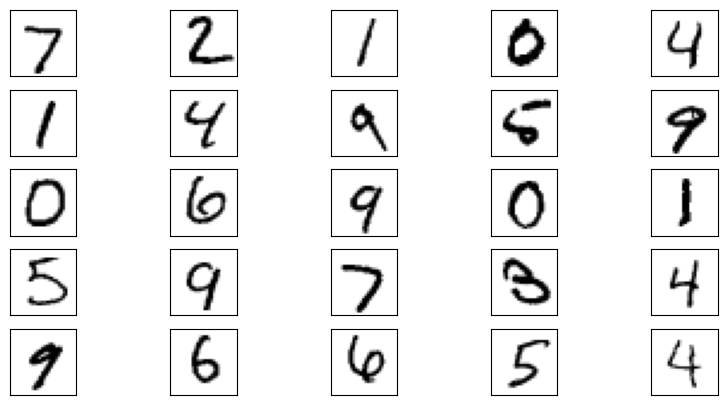

In [13]:
# by this string we may output images from x_test, which NN is going to recognize 
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)

plt.show()

1/1 [==============================] - 0s 10ms/step
[[9.7218117e-07 3.5489740e-09 3.4799575e-06 4.0697440e-08 9.9799985e-01
  2.0704075e-08 3.0309834e-06 3.3128134e-05 2.9361738e-07 1.9591732e-03]]
Recognized number is: 4


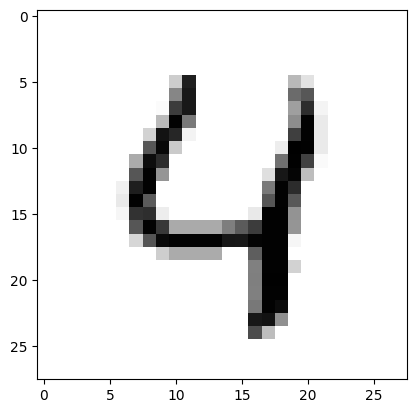

In [14]:
# finnaly by this code we may choose any number from x_test, which NN is going to recognize
n = 4 # this is the first imagine from x_test
x = np.expand_dims(x_test[n], axis=0) 
res = model.predict(x)
print(res)
print(f"Recognized number is: {np.argmax(res)}")


plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()